In [105]:
#importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [106]:
df=pd.read_csv("zeta-disease_training-data.csv")

In [107]:
df.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0


In [108]:
df.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,30.985000,172.407500,32.201625,69.565000,85.887500,0.544496,43.121250,4.051250,0.348750
std,13.824025,31.942438,8.549155,19.874784,126.333656,0.348711,30.409949,4.176173,0.476873
min,18.000000,94.000000,0.000000,0.000000,0.000000,0.140800,0.000000,0.000000,0.000000
25%,21.000000,149.000000,27.300000,62.000000,0.000000,0.307800,0.000000,1.000000,0.000000
50%,26.000000,167.000000,32.050000,72.000000,45.000000,0.445300,53.000000,3.000000,0.000000
75%,38.000000,192.000000,36.525000,80.000000,130.000000,0.699800,62.000000,6.000000,1.000000
max,109.000000,308.000000,86.100000,157.000000,1077.000000,3.481300,214.000000,40.000000,1.000000


In [109]:
# let's inspect the type of variables in pandas

df.dtypes

age                     int64
weight                  int64
bmi                   float64
blood_pressure          int64
insulin_test            int64
liver_stress_test     float64
cardio_stress_test      int64
years_smoking           int64
zeta_disease            int64
dtype: object

In [110]:
#inspecting the data
df['zeta_disease'].value_counts(dropna=False)

0    521
1    279
Name: zeta_disease, dtype: int64

##### observation: It is an imbalanced dataset

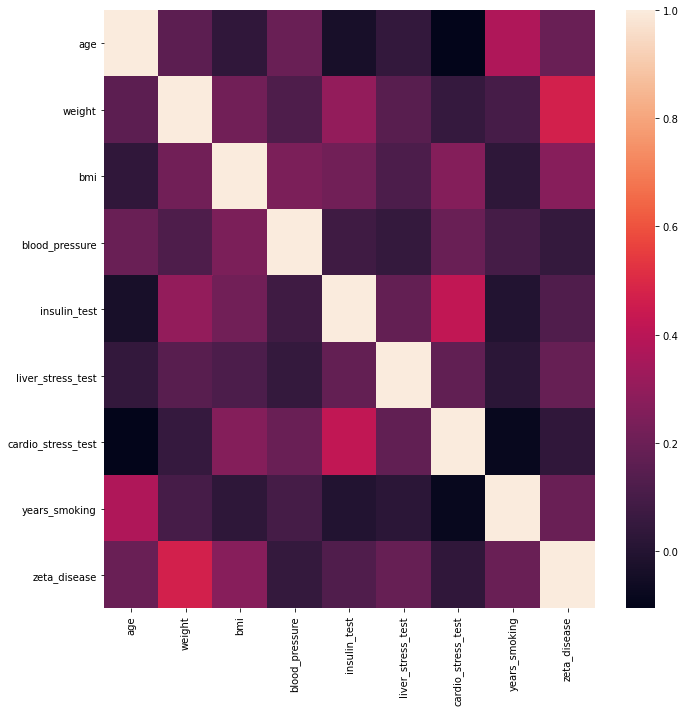

In [111]:
corrmat = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

# Feature Engineering

##### Checking for Nulls

In [114]:
#Checking for null values
df.isnull().sum()

age                   0
weight                0
bmi                   0
blood_pressure        0
insulin_test          0
liver_stress_test     0
cardio_stress_test    0
years_smoking         0
zeta_disease          0
dtype: int64

##### Outlier engineering

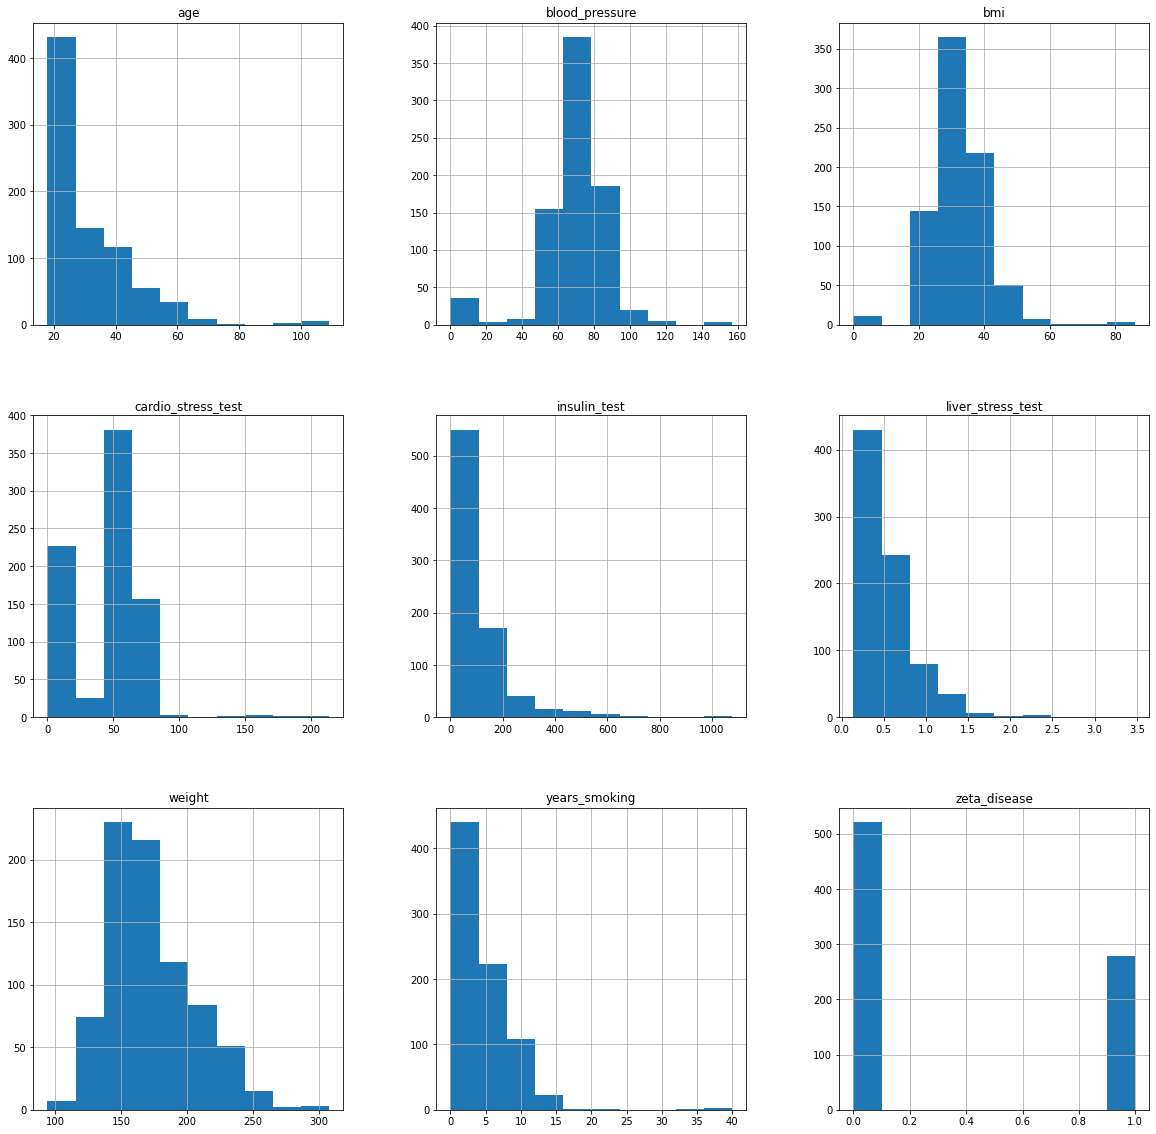

In [115]:
df.hist(figsize=(20,20))
plt.show()

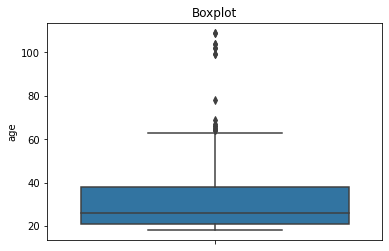

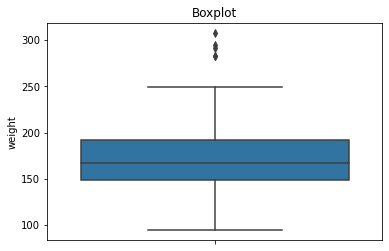

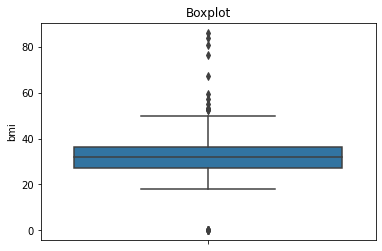

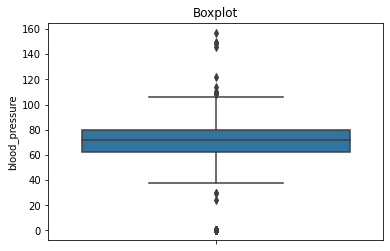

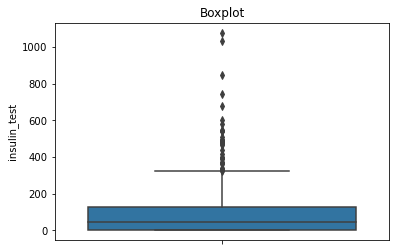

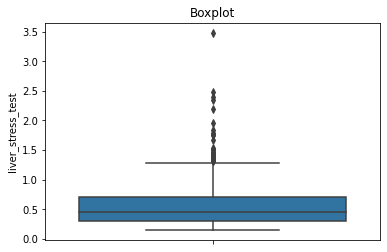

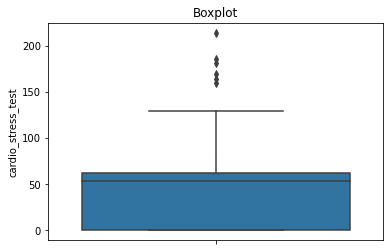

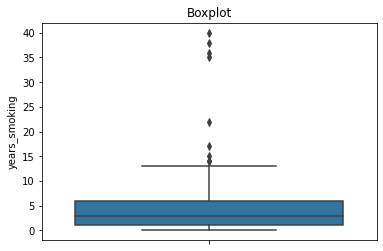

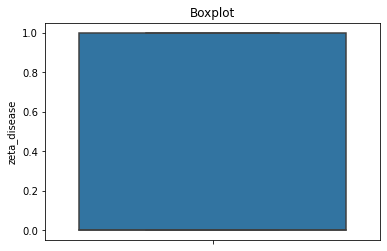

In [116]:
for col in df.columns:
    sns.boxplot(y=df[col])
    plt.title('Boxplot')
    plt.show()

In [117]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [118]:
def find_boundaries(df, variable):

    # the boundaries are the quantiles

    lower_boundary = df[variable].quantile(0.05)
    upper_boundary = df[variable].quantile(0.95)

    return upper_boundary, lower_boundary

In [119]:
weight_upper_limit, weight_lower_limit = find_skewed_boundaries(df, 'weight', 1.5)
weight_upper_limit, weight_lower_limit

(256.5, 84.5)

In [120]:
weight_g_upper_limit, weight_g_lower_limit = find_boundaries(df, 'weight')
weight_g_upper_limit, weight_g_lower_limit

(233.0, 130.0)

In [121]:
bmi_upper_limit, bmi_lower_limit = find_skewed_boundaries(df, 'bmi', 1.5)
bmi_upper_limit, bmi_lower_limit

(50.3625, 13.462500000000004)

In [122]:
bmi_g_upper_limit, bmi_g_lower_limit = find_boundaries(df, 'bmi')
bmi_g_upper_limit, bmi_g_lower_limit

(44.61999999999998, 21.8)

In [123]:
df['bmi']= np.where(df['bmi'] > bmi_upper_limit, bmi_upper_limit,
                       np.where(df['bmi'] < bmi_lower_limit, bmi_lower_limit, df['bmi']))

In [124]:
blood_pressure_upper_limit, blood_pressure_lower_limit = find_skewed_boundaries(df, 'blood_pressure', 1.5)
blood_pressure_upper_limit, blood_pressure_lower_limit

(107.0, 35.0)

In [125]:
blood_pressure_g_upper_limit, blood_pressure_g_lower_limit = find_boundaries(df, 'blood_pressure')
blood_pressure_g_upper_limit, blood_pressure_g_lower_limit

(92.0, 43.80000000000001)

In [126]:
df['blood_pressure']= np.where(df['blood_pressure'] > bmi_upper_limit, bmi_upper_limit,
                       np.where(df['blood_pressure'] < bmi_lower_limit, bmi_lower_limit, df['blood_pressure']))

In [127]:
insulin_test_upper_limit, insulin_test_lower_limit = find_skewed_boundaries(df, 'insulin_test', 1.5)
insulin_test_upper_limit, insulin_test_lower_limit

(325.0, -195.0)

In [128]:
insulin_test_g_upper_limit, insulin_test_g_lower_limit = find_boundaries(df, 'insulin_test')
insulin_test_g_upper_limit, insulin_test_g_lower_limit

(310.39999999999964, 0.0)

In [129]:
df['insulin_test']= np.where(df['insulin_test'] > insulin_test_upper_limit, insulin_test_upper_limit,
                       np.where(df['insulin_test'] < insulin_test_lower_limit, insulin_test_lower_limit, df['insulin_test']))

In [130]:
liver_stress_test_upper_limit, liver_stress_test_lower_limit = find_skewed_boundaries(df, 'liver_stress_test', 1.5)
liver_stress_test_upper_limit, liver_stress_test_lower_limit

(1.2877999999999998, -0.28019999999999995)

In [131]:
df['liver_stress_test']= np.where(df['liver_stress_test'] > liver_stress_test_upper_limit, liver_stress_test_upper_limit,
                       np.where(df['liver_stress_test'] < liver_stress_test_lower_limit, liver_stress_test_lower_limit, df['liver_stress_test']))

In [132]:
df.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,30.985000,172.407500,32.171422,48.575438,77.772500,0.529669,43.121250,4.051250,0.348750
std,13.824025,31.942438,7.088368,7.678616,95.586658,0.291608,30.409949,4.176173,0.476873
min,18.000000,94.000000,13.462500,13.462500,0.000000,0.140800,0.000000,0.000000,0.000000
25%,21.000000,149.000000,27.300000,50.362500,0.000000,0.307800,0.000000,1.000000,0.000000
50%,26.000000,167.000000,32.050000,50.362500,45.000000,0.445300,53.000000,3.000000,0.000000
75%,38.000000,192.000000,36.525000,50.362500,130.000000,0.699800,62.000000,6.000000,1.000000
max,109.000000,308.000000,50.362500,50.362500,325.000000,1.287800,214.000000,40.000000,1.000000


## feature Selection Techniques

In [133]:
df_x_values=df.drop(labels=['zeta_disease'],axis=1)
corrmat = df_x_values.corr()
corrmat = corrmat.abs().unstack() 
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.6]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr


In [134]:
scaler = StandardScaler()
scaler.fit(df_x_values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [135]:
sel= SelectFromModel(LogisticRegression(C=1, penalty='l1'))
sel.fit(scaler.transform(df_x_values.fillna(0)), df['zeta_disease'])

SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=None)

In [136]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [137]:
# Now I make a list with the selected features
selected_feat = df_x_values.columns[(sel.get_support())]

print('total features: {}'.format((df_x_values.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel.estimator_.coef_ == 0)))

total features: 8
selected features: 8
features with coefficients shrank to zero: 0


# Modeling

In [175]:
# separate dataset into train and validation
X_train, y_train=df.drop(labels=['zeta_disease'],axis=1), df['zeta_disease']
X_train.shape, y_train.shape

((800, 8), (800,))

In [176]:
from collections import Counter
Counter(y_train)
279/521

0.5355086372360844

In [177]:
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)

#### Logistic Regression

In [178]:
#Randomized_search_CV for Logistic Regression

logistic = LogisticRegression(class_weight='balanced',solver='saga', max_iter=200,
                              random_state=42)
distributions = dict(C=uniform(loc=0, scale=4),
                    penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions,scoring='roc_auc',cv=5,verbose=2, random_state=42)
search = clf.fit(X_train_scale, y_train)
search.best_params_,search.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=1.49816047538945, penalty=l2 ..................................
[CV] ................... C=1.49816047538945, penalty=l2, total=   0.0s
[CV] C=1.49816047538945, penalty=l2 ..................................
[CV] ................... C=1.49816047538945, penalty=l2, total=   0.0s
[CV] C=1.49816047538945, penalty=l2 ..................................
[CV] ................... C=1.49816047538945, penalty=l2, total=   0.0s
[CV] C=1.49816047538945, penalty=l2 ..................................
[CV] ................... C=1.49816047538945, penalty=l2, total=   0.0s
[CV] C=1.49816047538945, penalty=l2 ..................................
[CV] ................... C=1.49816047538945, penalty=l2, total=   0.0s
[CV] C=0.7337391594646552, penalty=l1 ................................
[CV] ................. C=0.7337391594646552, penalty=l1, total=   0.0s
[CV] C=0.7337391594646552, penalty=l1 ................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=2.832290311184182, penalty=l1, total=   0.0s
[CV] C=2.832290311184182, penalty=l1 .................................
[CV] .................. C=2.832290311184182, penalty=l1, total=   0.0s
[CV] C=2.832290311184182, penalty=l1 .................................
[CV] .................. C=2.832290311184182, penalty=l1, total=   0.0s
[CV] C=2.832290311184182, penalty=l1 .................................
[CV] .................. C=2.832290311184182, penalty=l1, total=   0.0s
[CV] C=2.832290311184182, penalty=l1 .................................
[CV] .................. C=2.832290311184182, penalty=l1, total=   0.0s
[CV] C=0.22564631610840102, penalty=l1 ...............................
[CV] ................ C=0.22564631610840102, penalty=l1, total=   0.0s
[CV] C=0.22564631610840102, penalty=l1 ...............................
[CV] ................ C=0.22564631610840102, penalty=l1, total=   0.0s
[CV] C=0.22564631610840102, penalty=l1 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


({'C': 0.7337391594646552, 'penalty': 'l1'}, 0.8362421640859141)

#### Random Forest

In [179]:
###Randomized_search_CV for Random Forest

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier(class_weight='balanced')

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='roc_auc', n_iter = 100,cv=5,  verbose=2, random_state=42, n_jobs = -1)
search_rf=rf_random.fit(X_train, y_train)
search_rf.best_params_,search_rf.best_score_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   25.3s finished


({'n_estimators': 52,
  'min_samples_split': 2,
  'min_samples_leaf': 4,
  'max_features': 'auto',
  'max_depth': 40,
  'bootstrap': True},
 0.8478989135864136)

In [180]:
clf = xgb.XGBClassifier()
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 20, num = 1)]

param_grid = {
        'max_depth': max_depth,
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.01, 0.05,0.1,0.5,1],
        'n_estimators': n_estimators}


xgb_clf = RandomizedSearchCV(clf, param_grid, n_iter=20,cv=5,
                            n_jobs=1, verbose=2,
                            scoring='roc_auc', refit=False, random_state=42)
search_xgb=xgb_clf.fit(X_train, y_train)
search_xgb.best_params_,search_rf.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] subsample=0.9, reg_lambda=0.5, n_estimators=157, min_child_weight=5.0, max_depth=1, learning_rate=0.001, gamma=0.5, colsample_bytree=0.7, colsample_bylevel=0.9 
[12:08:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.9, reg_lambda=0.5, n_estimators=157, min_child_weight=5.0, max_depth=1, learning_rate=0.001, gamma=0.5, colsample_bytree=0.7, colsample_bylevel=0.9, total=   0.0s
[CV] subsample=0.9, reg_lambda=0.5, n_estimators=157, min_child_weight=5.0, max_depth=1, learning_rate=0.001, gamma=0.5, colsample_bytree=0.7, colsample_bylevel=0.9 
[12:08:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in X

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData

[CV]  subsample=0.9, reg_lambda=0.5, n_estimators=157, min_child_weight=5.0, max_depth=1, learning_rate=0.001, gamma=0.5, colsample_bytree=0.7, colsample_bylevel=0.9, total=   0.0s
[CV] subsample=0.9, reg_lambda=0.5, n_estimators=157, min_child_weight=5.0, max_depth=1, learning_rate=0.001, gamma=0.5, colsample_bytree=0.7, colsample_bylevel=0.9 
[12:08:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.9, reg_lambda=0.5, n_estimators=157, min_child_weight=5.0, max_depth=1, learning_rate=0.001, gamma=0.5, colsample_bytree=0.7, colsample_bylevel=0.9, total=   0.0s
[CV] subsample=0.9, reg_lambda=0.5, n_estimators=157, min_child_weight=5.0, max_depth=1, learning_rate=0.001, gamma=0.5, colsample_bytree=0.7, colsample_bylevel=0

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  subsample=0.6, reg_lambda=0.5, n_estimators=157, min_child_weight=3.0, max_depth=1, learning_rate=0.01, gamma=0, colsample_bytree=1.0, colsample_bylevel=1.0, total=   0.0s
[CV] subsample=0.6, reg_lambda=0.5, n_estimators=157, min_child_weight=3.0, max_depth=1, learning_rate=0.01, gamma=0, colsample_bytree=1.0, colsample_bylevel=1.0 
[12:08:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.6, reg_lambda=0.5, n_estimators=157, min_child_weight=3.0, max_depth=1, learning_rate=0.01, gamma=0, colsample_bytree=1.0, colsample_bylevel=1.0, total=   0.0s
[CV] subsample=0.6, reg_lambda=0.5, n_estimators=157, min_child_weight=3.0, max_depth=1, learning_rate=0.01, gamma=0, colsample_bytree=1.0, colsample_bylevel=1.0 
[12:08:3

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  subsample=0.6, reg_lambda=0.5, n_estimators=157, min_child_weight=3.0, max_depth=1, learning_rate=0.01, gamma=0, colsample_bytree=1.0, colsample_bylevel=1.0, total=   0.0s
[CV] subsample=0.6, reg_lambda=0.5, n_estimators=157, min_child_weight=3.0, max_depth=1, learning_rate=0.01, gamma=0, colsample_bytree=1.0, colsample_bylevel=1.0 
[12:08:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.6, reg_lambda=0.5, n_estimators=157, min_child_weight=3.0, max_depth=1, learning_rate=0.01, gamma=0, colsample_bytree=1.0, colsample_bylevel=1.0, total=   0.0s
[CV] subsample=0.7, reg_lambda=0.01, n_estimators=157, min_child_weight=7.0, max_depth=1, learning_rate=0, gamma=0.5, colsample_bytree=0.7, colsample_bylevel=0.9 
[12:08:3

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  subsample=0.7, reg_lambda=0.01, n_estimators=157, min_child_weight=7.0, max_depth=1, learning_rate=0, gamma=0.5, colsample_bytree=0.7, colsample_bylevel=0.9, total=   0.0s
[CV] subsample=0.7, reg_lambda=0.01, n_estimators=157, min_child_weight=7.0, max_depth=1, learning_rate=0, gamma=0.5, colsample_bytree=0.7, colsample_bylevel=0.9 
[12:08:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.7, reg_lambda=0.01, n_estimators=157, min_child_weight=7.0, max_depth=1, learning_rate=0, gamma=0.5, colsample_bytree=0.7, colsample_bylevel=0.9, total=   0.0s
[CV] subsample=0.7, reg_lambda=0.01, n_estimators=157, min_child_weight=7.0, max_depth=1, learning_rate=0, gamma=0.5, colsample_bytree=0.7, colsample_bylevel=0.9 
[12:08:3

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  subsample=0.7, reg_lambda=0.01, n_estimators=157, min_child_weight=7.0, max_depth=1, learning_rate=0, gamma=0.5, colsample_bytree=0.7, colsample_bylevel=0.9, total=   0.0s
[CV] subsample=0.5, reg_lambda=0.05, n_estimators=178, min_child_weight=7.0, max_depth=1, learning_rate=0.2, gamma=1.0, colsample_bytree=0.9, colsample_bylevel=0.9 
[12:08:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.5, reg_lambda=0.05, n_estimators=178, min_child_weight=7.0, max_depth=1, learning_rate=0.2, gamma=1.0, colsample_bytree=0.9, colsample_bylevel=0.9, total=   0.0s
[CV] subsample=0.5, reg_lambda=0.05, n_estimators=178, min_child_weight=7.0, max_depth=1, learning_rate=0.2, gamma=1.0, colsample_bytree=0.9, colsample_bylevel=0.9 
[1

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV]  subsample=0.5, reg_lambda=0.05, n_estimators=178, min_child_weight=7.0, max_depth=1, learning_rate=0.2, gamma=1.0, colsample_bytree=0.9, colsample_bylevel=0.9, total=   0.0s
[CV] subsample=0.5, reg_lambda=0.05, n_estimators=178, min_child_weight=7.0, max_depth=1, learning_rate=0.2, gamma=1.0, colsample_bytree=0.9, colsample_bylevel=0.9 
[12:08:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.5, reg_lambda=0.05, n_estimators=178, min_child_weight=7.0, max_depth=1, learning_rate=0.2, gamma=1.0, colsample_bytree=0.9, colsample_bylevel=0.9, total=   0.0s
[CV] subsample=0.5, reg_lambda=0.05, n_estimators=178, min_child_weight=7.0, max_depth=1, learning_rate=0.2, gamma=1.0, colsample_bytree=0.9, colsample_bylevel=0.9 

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[12:08:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.5, reg_lambda=0.05, n_estimators=178, min_child_weight=7.0, max_depth=1, learning_rate=0.2, gamma=1.0, colsample_bytree=0.9, colsample_bylevel=0.9, total=   0.0s
[CV] subsample=1.0, reg_lambda=0.1, n_estimators=178, min_child_weight=1.0, max_depth=1, learning_rate=0.2, gamma=0.25, colsample_bytree=0.5, colsample_bylevel=0.8 
[12:08:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=1.0, reg_lambda=0.1

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  subsample=1.0, reg_lambda=0.1, n_estimators=178, min_child_weight=1.0, max_depth=1, learning_rate=0.2, gamma=0.25, colsample_bytree=0.5, colsample_bylevel=0.8, total=   0.0s
[CV] subsample=1.0, reg_lambda=0.1, n_estimators=178, min_child_weight=1.0, max_depth=1, learning_rate=0.2, gamma=0.25, colsample_bytree=0.5, colsample_bylevel=0.8 
[12:08:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=1.0, reg_lambda=0.1, n_estimators=178, min_child_weight=1.0, max_depth=1, learning_rate=0.2, gamma=0.25, colsample_bytree=0.5, colsample_bylevel=0.8, total=   0.0s
[CV] subsample=1.0, reg_lambda=0.1, n_estimators=178, min_child_weight=1.0, max_depth=1, learning_rate=0.2, gamma=0.25, colsample_bytree=0.5, colsample_bylevel=0.8 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  subsample=1.0, reg_lambda=0.1, n_estimators=178, min_child_weight=1.0, max_depth=1, learning_rate=0.2, gamma=0.25, colsample_bytree=0.5, colsample_bylevel=0.8, total=   0.0s
[CV] subsample=0.7, reg_lambda=0.5, n_estimators=136, min_child_weight=10.0, max_depth=1, learning_rate=0.2, gamma=1.0, colsample_bytree=0.5, colsample_bylevel=0.4 
[12:08:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.7, reg_lambda=0.5, n_estimators=136, min_child_weight=10.0, max_depth=1, learning_rate=0.2, gamma=1.0, colsample_bytree=0.5, colsample_bylevel=0.4, total=   0.0s
[CV] subsample=0.7, reg_lambda=0.5, n_estimators=136, min_child_weight=10.0, max_depth=1, learning_rate=0.2, gamma=1.0, colsample_bytree=0.5, colsample_bylevel=0.4 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  subsample=0.7, reg_lambda=0.5, n_estimators=136, min_child_weight=10.0, max_depth=1, learning_rate=0.2, gamma=1.0, colsample_bytree=0.5, colsample_bylevel=0.4, total=   0.0s
[CV] subsample=0.7, reg_lambda=0.5, n_estimators=136, min_child_weight=10.0, max_depth=1, learning_rate=0.2, gamma=1.0, colsample_bytree=0.5, colsample_bylevel=0.4 
[12:08:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.7, reg_lambda=0.5, n_estimators=136, min_child_weight=10.0, max_depth=1, learning_rate=0.2, gamma=1.0, colsample_bytree=0.5, colsample_bylevel=0.4, total=   0.0s
[CV] subsample=0.7, reg_lambda=0.5, n_estimators=136, min_child_weight=10.0, max_depth=1, learning_rate=0.2, gamma=1.0, colsample_bytree=0.5, colsample_bylevel=0.4 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  subsample=0.7, reg_lambda=0.1, n_estimators=94, min_child_weight=0.5, max_depth=1, learning_rate=3, gamma=0.5, colsample_bytree=0.9, colsample_bylevel=0.5, total=   0.0s
[CV] subsample=0.7, reg_lambda=0.1, n_estimators=94, min_child_weight=0.5, max_depth=1, learning_rate=3, gamma=0.5, colsample_bytree=0.9, colsample_bylevel=0.5 
[12:08:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.7, reg_lambda=0.1, n_estimators=94, min_child_weight=0.5, max_depth=1, learning_rate=3, gamma=0.5, colsample_bytree=0.9, colsample_bylevel=0.5, total=   0.0s
[CV] subsample=0.7, reg_lambda=0.1, n_estimators=94, min_child_weight=0.5, max_depth=1, learning_rate=3, gamma=0.5, colsample_bytree=0.9, colsample_bylevel=0.5 
[12:08:41] WARNI

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] subsample=0.4, reg_lambda=0.05, n_estimators=52, min_child_weight=0.5, max_depth=1, learning_rate=0.01, gamma=1.0, colsample_bytree=0.7, colsample_bylevel=0.9 
[12:08:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.4, reg_lambda=0.05, n_estimators=52, min_child_weight=0.5, max_depth=1, learning_rate=0.01, gamma=1.0, colsample_bytree=0.7, colsample_bylevel=0.9, total=   0.0s
[CV] subsample=0.4, reg_lambda=0.05, n_estimators=52, min_child_weight=0.5, max_depth=1, learning_rate=0.01, gamma=1.0, colsample_bytree=0.7, colsample_bylevel=0.9 
[12:08:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the object

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] subsample=0.9, reg_lambda=0.01, n_estimators=10, min_child_weight=1.0, max_depth=1, learning_rate=0.001, gamma=0.25, colsample_bytree=1.0, colsample_bylevel=0.7 
[12:08:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.9, reg_lambda=0.01, n_estimators=10, min_child_weight=1.0, max_depth=1, learning_rate=0.001, gamma=0.25, colsample_bytree=1.0, colsample_bylevel=0.7, total=   0.0s
[CV] subsample=0.9, reg_lambda=0.01, n_estimators=10, min_child_weight=1.0, max_depth=1, learning_rate=0.001, gamma=0.25, colsample_bytree=1.0, colsample_bylevel=0.7 
[12:08:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the 

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] subsample=0.5, reg_lambda=1, n_estimators=31, min_child_weight=7.0, max_depth=1, learning_rate=0.001, gamma=1.0, colsample_bytree=1.0, colsample_bylevel=0.8 
[12:08:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.5, reg_lambda=1, n_estimators=31, min_child_weight=7.0, max_depth=1, learning_rate=0.001, gamma=1.0, colsample_bytree=1.0, colsample_bylevel=0.8, total=   0.0s
[CV] subsample=0.5, reg_lambda=1, n_estimators=31, min_child_weight=7.0, max_depth=1, learning_rate=0.001, gamma=1.0, colsample_bytree=1.0, colsample_bylevel=0.8 
[12:08:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'b

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] subsample=0.5, reg_lambda=1, n_estimators=31, min_child_weight=3.0, max_depth=1, learning_rate=3, gamma=0.5, colsample_bytree=0.9, colsample_bylevel=0.6 
[12:08:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.5, reg_lambda=1, n_estimators=31, min_child_weight=3.0, max_depth=1, learning_rate=3, gamma=0.5, colsample_bytree=0.9, colsample_bylevel=0.6, total=   0.0s
[CV] subsample=0.5, reg_lambda=1, n_estimators=31, min_child_weight=3.0, max_depth=1, learning_rate=3, gamma=0.5, colsample_bytree=0.9, colsample_bylevel=0.6 
[12:08:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  subsample=0.6, reg_lambda=1, n_estimators=178, min_child_weight=7.0, max_depth=1, learning_rate=0, gamma=0.25, colsample_bytree=0.8, colsample_bylevel=0.9, total=   0.0s
[CV] subsample=0.6, reg_lambda=1, n_estimators=178, min_child_weight=7.0, max_depth=1, learning_rate=0, gamma=0.25, colsample_bytree=0.8, colsample_bylevel=0.9 
[12:08:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.6, reg_lambda=1, n_estimators=178, min_child_weight=7.0, max_depth=1, learning_rate=0, gamma=0.25, colsample_bytree=0.8, colsample_bylevel=0.9, total=   0.0s
[CV] subsample=0.6, reg_lambda=1, n_estimators=178, min_child_weight=7.0, max_depth=1, learning_rate=0, gamma=0.25, colsample_bytree=0.8, colsample_bylevel=0.9 
[12:08:42] WARNI

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[12:08:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.6, reg_lambda=1, n_estimators=178, min_child_weight=7.0, max_depth=1, learning_rate=0, gamma=0.25, colsample_bytree=0.8, colsample_bylevel=0.9, total=   0.0s
[CV] subsample=1.0, reg_lambda=0.5, n_estimators=157, min_child_weight=5.0, max_depth=1, learning_rate=0.001, gamma=0.5, colsample_bytree=0.4, colsample_bylevel=0.7 
[12:08:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=1.0, reg_lambda=0.5, n

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] subsample=1.0, reg_lambda=0.01, n_estimators=94, min_child_weight=10.0, max_depth=1, learning_rate=0.01, gamma=1.0, colsample_bytree=0.8, colsample_bylevel=0.4 
[12:08:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=1.0, reg_lambda=0.01, n_estimators=94, min_child_weight=10.0, max_depth=1, learning_rate=0.01, gamma=1.0, colsample_bytree=0.8, colsample_bylevel=0.4, total=   0.0s
[CV] subsample=1.0, reg_lambda=0.01, n_estimators=94, min_child_weight=10.0, max_depth=1, learning_rate=0.01, gamma=1.0, colsample_bytree=0.8, colsample_bylevel=0.4 
[12:08:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the obj

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] subsample=1.0, reg_lambda=0.01, n_estimators=94, min_child_weight=10.0, max_depth=1, learning_rate=0.01, gamma=1.0, colsample_bytree=0.8, colsample_bylevel=0.4 
[12:08:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=1.0, reg_lambda=0.01, n_estimators=94, min_child_weight=10.0, max_depth=1, learning_rate=0.01, gamma=1.0, colsample_bytree=0.8, colsample_bylevel=0.4, total=   0.0s
[CV] subsample=0.5, reg_lambda=0.01, n_estimators=136, min_child_weight=10.0, max_depth=1, learning_rate=0.1, gamma=0, colsample_bytree=0.6, colsample_bylevel=0.9 
[12:08:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objec

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] subsample=0.5, reg_lambda=0.01, n_estimators=136, min_child_weight=10.0, max_depth=1, learning_rate=0.1, gamma=0, colsample_bytree=0.6, colsample_bylevel=0.9 
[12:08:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.5, reg_lambda=0.01, n_estimators=136, min_child_weight=10.0, max_depth=1, learning_rate=0.1, gamma=0, colsample_bytree=0.6, colsample_bylevel=0.9, total=   0.0s
[CV] subsample=0.5, reg_lambda=0.01, n_estimators=136, min_child_weight=10.0, max_depth=1, learning_rate=0.1, gamma=0, colsample_bytree=0.6, colsample_bylevel=0.9 
[12:08:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  subsample=0.5, reg_lambda=0.01, n_estimators=136, min_child_weight=10.0, max_depth=1, learning_rate=0.1, gamma=0, colsample_bytree=0.6, colsample_bylevel=0.9, total=   0.0s
[CV] subsample=0.8, reg_lambda=0.01, n_estimators=94, min_child_weight=1.0, max_depth=1, learning_rate=3, gamma=0.5, colsample_bytree=0.9, colsample_bylevel=0.4 
[12:08:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.8, reg_lambda=0.01, n_estimators=94, min_child_weight=1.0, max_depth=1, learning_rate=3, gamma=0.5, colsample_bytree=0.9, colsample_bylevel=0.4, total=   0.0s
[CV] subsample=0.8, reg_lambda=0.01, n_estimators=94, min_child_weight=1.0, max_depth=1, learning_rate=3, gamma=0.5, colsample_bytree=0.9, colsample_bylevel=0.4 
[12:08:43]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  subsample=0.8, reg_lambda=0.01, n_estimators=94, min_child_weight=1.0, max_depth=1, learning_rate=3, gamma=0.5, colsample_bytree=0.9, colsample_bylevel=0.4, total=   0.0s
[CV] subsample=0.8, reg_lambda=0.01, n_estimators=94, min_child_weight=1.0, max_depth=1, learning_rate=3, gamma=0.5, colsample_bytree=0.9, colsample_bylevel=0.4 
[12:08:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.8, reg_lambda=0.01, n_estimators=94, min_child_weight=1.0, max_depth=1, learning_rate=3, gamma=0.5, colsample_bytree=0.9, colsample_bylevel=0.4, total=   0.0s
[CV] subsample=0.4, reg_lambda=0.01, n_estimators=10, min_child_weight=0.5, max_depth=1, learning_rate=0, gamma=0.5, colsample_bytree=1.0, colsample_bylevel=0.5 
[12:08:43] W

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[12:08:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=1.0, reg_lambda=0.05, n_estimators=31, min_child_weight=0.5, max_depth=1, learning_rate=0.01, gamma=1.0, colsample_bytree=0.6, colsample_bylevel=0.7, total=   0.0s
[CV] subsample=1.0, reg_lambda=0.05, n_estimators=31, min_child_weight=0.5, max_depth=1, learning_rate=0.01, gamma=1.0, colsample_bytree=0.6, colsample_bylevel=0.7 
[12:08:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=1.0, reg_lambda=0.0

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[12:08:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.6, reg_lambda=0.05, n_estimators=52, min_child_weight=1.0, max_depth=1, learning_rate=0, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.0s
[CV] subsample=0.6, reg_lambda=0.05, n_estimators=52, min_child_weight=1.0, max_depth=1, learning_rate=0, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.8 
[12:08:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.6, reg_lambda=0.05, n_e

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[CV]  subsample=0.8, reg_lambda=0.5, n_estimators=136, min_child_weight=1.0, max_depth=1, learning_rate=0, gamma=0.5, colsample_bytree=0.9, colsample_bylevel=0.4, total=   0.0s
[CV] subsample=0.8, reg_lambda=0.5, n_estimators=136, min_child_weight=1.0, max_depth=1, learning_rate=0, gamma=0.5, colsample_bytree=0.9, colsample_bylevel=0.4 
[12:08:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.8, reg_lambda=0.5, n_estimators=136, min_child_weight=1.0, max_depth=1, learning_rate=0, gamma=0.5, colsample_bytree=0.9, colsample_bylevel=0.4, total=   0.0s
[CV] subsample=0.8, reg_lambda=0.5, n_estimators=136, min_child_weight=1.0, max_depth=1, learning_rate=0, gamma=0.5, colsample_bytree=0.9, colsample_bylevel=0.4 
[12:08:44] W

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab


[CV] subsample=0.8, reg_lambda=0.5, n_estimators=136, min_child_weight=1.0, max_depth=1, learning_rate=0, gamma=0.5, colsample_bytree=0.9, colsample_bylevel=0.4 
[12:08:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.8, reg_lambda=0.5, n_estimators=136, min_child_weight=1.0, max_depth=1, learning_rate=0, gamma=0.5, colsample_bytree=0.9, colsample_bylevel=0.4, total=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.6s finished


({'subsample': 1.0,
  'reg_lambda': 0.1,
  'n_estimators': 178,
  'min_child_weight': 1.0,
  'max_depth': 1,
  'learning_rate': 0.2,
  'gamma': 0.25,
  'colsample_bytree': 0.5,
  'colsample_bylevel': 0.8},
 0.8478989135864136)

##### Observation: random Forest and Xgboost performed on similar Lines with Random Serach CV

### Reading the Test Sample

In [181]:
df_test=pd.read_csv("zeta-disease_prediction-data.csv")

In [182]:
df_test.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24,151,39.5,69,72,1.3968,56,4,NaN
1,27,179,35.5,89,156,1.6608,43,6,NaN
2,34,147,26.9,76,74,1.6958,53,2,NaN
3,35,206,32.4,73,127,1.4608,61,6,NaN
4,60,193,29.8,62,192,1.7798,65,9,NaN


#### Outlier Treatmeant:

In [183]:
bmi_upper_limit, bmi_lower_limit = find_skewed_boundaries(df_test, 'bmi', 1.5)
df_test['bmi']= np.where(df_test['bmi'] > bmi_upper_limit, bmi_upper_limit,
                       np.where(df_test['bmi'] < bmi_lower_limit, bmi_lower_limit, df_test['bmi']))

In [184]:
blood_pressure_upper_limit, blood_pressure_lower_limit = find_skewed_boundaries(df_test, 'blood_pressure', 1.5)
df_test['bmi']= np.where(df_test['blood_pressure'] > blood_pressure_upper_limit, blood_pressure_upper_limit,
                       np.where(df_test['blood_pressure'] < blood_pressure_lower_limit, blood_pressure_lower_limit, df_test['blood_pressure']))

In [185]:
liver_stress_test_upper_limit, liver_stress_test_lower_limit = find_skewed_boundaries(df_test, 'liver_stress_test', 1.5)
liver_stress_test_upper_limit, liver_stress_test_lower_limit

(2.2268, 0.9227999999999998)

In [186]:
insulin_test_upper_limit, insulin_test_lower_limit = find_skewed_boundaries(df_test, 'insulin_test', 1.5)
insulin_test_upper_limit, insulin_test_lower_limit

(305.0, -61.0)

In [187]:
insulin_test_g_upper_limit, insulin_test_g_lower_limit = find_boundaries(df_test, 'insulin_test')

In [188]:
df_test['liver_stress_test']= np.where(df_test['liver_stress_test'] > liver_stress_test_upper_limit, liver_stress_test_upper_limit,
                       np.where(df_test['liver_stress_test'] < liver_stress_test_lower_limit, liver_stress_test_lower_limit, df_test['liver_stress_test']))

In [189]:
# separate dataset into train and validation
X_test, y_test=df_test.drop(labels=['zeta_disease'],axis=1), df_test['zeta_disease']
X_test.shape, y_test.shape

((20, 8), (20,))

In [190]:
#predicting the test dataset for randomforest
rf_clf = RandomForestClassifier(n_estimators=200, min_samples_split=2,min_samples_leaf=2,max_features='sqrt',max_depth=20,bootstrap=True,
                                random_state=42)
rf_clf.fit(X_train, y_train)
predictions_rf = rf_clf.predict(X_test)

In [191]:
df_test['zeta_disease']=predictions_rf

### Final Prediction

In [192]:
df_test

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24,151,69.0,69,72,1.3968,56,4,0
1,27,179,89.0,89,156,1.6608,43,6,1
2,34,147,76.0,76,74,1.6958,53,2,0
3,35,206,73.0,73,127,1.4608,61,6,1
4,60,193,62.0,62,192,1.7798,65,9,1
5,45,120,108.0,108,50,1.2978,54,12,0
6,20,139,61.0,61,77,1.5818,68,3,0
7,23,137,70.0,70,73,1.4168,59,7,0
8,36,195,59.0,59,141,1.4498,59,6,1
9,19,193,84.0,84,66,1.7938,50,3,1


##### Implementing simple Neural Network- Extra Analysis- Still Hyper parameters needs to be Tuned

In [193]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=8, units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
800/800 [==============================] - 0s 344us/step - loss: 0.6779 - accuracy: 0.6513
Epoch 2/100
800/800 [==============================] - 0s 109us/step - loss: 0.6634 - accuracy: 0.6513
Epoch 3/100
800/800 [==============================] - 0s 111us/step - loss: 0.6589 - accuracy: 0.6513
Epoch 4/100
800/800 [==============================] - 0s 112us/step - loss: 0.6534 - accuracy: 0.6513
Epoch 5/100
800/800 [==============================] - 0s 111us/step - loss: 0.6489 - accuracy: 0.6513
Epoch 6/100
800/800 [==============================] - 0s 114us/step - loss: 0.6411 - accuracy: 0.6513
Epoch 7/100
800/800 [==============================] - 0s 113us/step - loss: 0.6342 - accuracy: 0.6513
Epoch 8/100
800/800 [==============================] - 0s 106us/step - loss: 0.6236 - accuracy: 0.6513
Epoch 9/100
800/800 [==============================] - 0s 110us/step - loss: 0.6107 - accuracy: 0.6513
Epoch 10/100
800/800 [==============================] - 0s 113us/step - l

800/800 [==============================] - 0s 114us/step - loss: 0.4878 - accuracy: 0.7487
Epoch 80/100
800/800 [==============================] - 0s 109us/step - loss: 0.4764 - accuracy: 0.7538
Epoch 81/100
800/800 [==============================] - 0s 109us/step - loss: 0.4775 - accuracy: 0.7513
Epoch 82/100
800/800 [==============================] - 0s 112us/step - loss: 0.4790 - accuracy: 0.7475
Epoch 83/100
800/800 [==============================] - 0s 109us/step - loss: 0.4821 - accuracy: 0.7425
Epoch 84/100
800/800 [==============================] - 0s 115us/step - loss: 0.4815 - accuracy: 0.7513
Epoch 85/100
800/800 [==============================] - 0s 110us/step - loss: 0.4819 - accuracy: 0.7588
Epoch 86/100
800/800 [==============================] - 0s 112us/step - loss: 0.4769 - accuracy: 0.7550
Epoch 87/100
800/800 [==============================] - 0s 104us/step - loss: 0.4755 - accuracy: 0.7563
Epoch 88/100
800/800 [==============================] - 0s 113us/step - loss:

In [194]:
y_pred = (y_pred > 0.5)
df_test['zeta_disease_nw']=y_pred

In [195]:
y_pred

array([[False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False]])

In [196]:
df_test['zeta_disease_nw']=df_test['zeta_disease_nw'].apply(lambda x:1 if x==True else 0)

#### Added Column of ANN Prediction to df_test

In [197]:
df_test

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease,zeta_disease_nw
0,24,151,69.0,69,72,1.3968,56,4,0,0
1,27,179,89.0,89,156,1.6608,43,6,1,0
2,34,147,76.0,76,74,1.6958,53,2,0,0
3,35,206,73.0,73,127,1.4608,61,6,1,0
4,60,193,62.0,62,192,1.7798,65,9,1,1
5,45,120,108.0,108,50,1.2978,54,12,0,0
6,20,139,61.0,61,77,1.5818,68,3,0,0
7,23,137,70.0,70,73,1.4168,59,7,0,0
8,36,195,59.0,59,141,1.4498,59,6,1,1
9,19,193,84.0,84,66,1.7938,50,3,1,0


##### Observation: Since we need to tuned parameters in ANN it didnt perform very well. Needs to work on this